<h1><center> US Permanent Visa Applications </h1>
**Hypothesis:** Class of admission code, current country of citizenship, and current employer have a great effect on being accepted for a permanent Visa. The wage the employee is hired for also contributes to the possibility whether a permanent Visa would be approved.

In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [184]:
data = pd.read_csv("us_perm_visas.csv")
data

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,PERM,A-07352-06288,NaN,NaN,Denied,EWI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,PERM,A-07354-06926,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,PERM,A-08004-10147,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,PERM,A-08004-10184,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,PERM,A-08010-11785,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
Next, we will clean the data by choosing the columns that are relevant to 
what we think leads to a higher chance of being accepted and remove samples
that have any missing features. 

In [185]:
data2 = data[['application_type', 'case_no', 'case_received_date', 
              'case_status','class_of_admission', 'country_of_citizenship', 
              'decision_date', 'employer_city', 'employer_decl_info_title', 
              'employer_name', 'employer_postal_code', 'employer_state', 
              'job_info_work_city', 'job_info_work_postal_code', 
              'job_info_work_state', 'naics_2007_us_title', 'pw_amount_9089',
              'pw_job_title_9089', 'pw_level_9089', 'pw_soc_code', 
              'pw_soc_title', 'pw_source_name_9089', 'pw_unit_of_pay_9089', 
              'us_economic_sector', 'wage_offer_from_9089',
              'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089']]

data2

,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_city,employer_decl_info_title,employer_name,...,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089
0,PERM,A-07323-97014,NaN,Certified,J-1,NaN,2/1/2012,NEW YORK,NaN,NETSOFT USA INC.,...,"Computer Software Engineers, Applications",Level II,15-1031.00,"Computer Software Engineers, Applications",OES,yr,IT,75629,NaN,yr
1,PERM,A-07332-99439,NaN,Denied,B-2,NaN,12/21/2011,CARLSTADT,NaN,PINNACLE ENVIRONEMNTAL CORP,...,ASBESTOS HANDLER,Level I,47-4041.00,Hazardous Materials Removal Workers,OES,yr,Other Economic Sector,37024,NaN,yr
2,PERM,A-07333-99643,NaN,Certified,H-1B,NaN,12/1/2011,GLEN ALLEN,NaN,"SCHNABEL ENGINEERING, INC.",...,Civil Engineer,Level I,17-2051.00,Civil Engineers,OES,yr,Aerospace,47923,NaN,yr
3,PERM,A-07339-01930,NaN,Certified,B-2,NaN,12/1/2011,FLUSHING,NaN,EBENEZER MISSION CHURCH,...,File Clerk,Level II,43-4071.00,File Clerks,OES,hr,Other Economic Sector,10.97,NaN,hr
4,PERM,A-07345-03565,NaN,Certified,L-1,NaN,1/26/2012,ALBANY,NaN,ALBANY INTERNATIONAL CORP.,...,Sales & Service Engineer,Level IV,41-9031.00,Sales Engineers,OES,yr,Advanced Mfg,100000,NaN,yr
5,PERM,A-07352-06288,NaN,Denied,EWI,NaN,1/26/2012,CARLSTADT,NaN,PINNACLE ENVIRONEMNTAL CORP,...,hazardous materials removal worker,Level I,47-4041.00,Hazardous Materials Removal Workers,OES,yr,Other Economic Sector,37024,NaN,yr
6,PERM,A-07354-06926,NaN,Certified-Expired,H-1B,NaN,10/7/2011,TROY,NaN,EMMA WILLARD SCHOOL,...,"Secondary School Teachers, Except Special and ...",Level II,25-2031.00,"Secondary School Teachers, Except Special and ...",OES,yr,Educational Services,47084,52000,yr
7,PERM,A-08004-10147,NaN,Denied,E-2,NaN,2/6/2012,POMPANO BEACH,NaN,FDS ALUMINUM LLC,...,COST ESTIMATOR,Level I,13-1051.00,Cost Estimators,OES,yr,Advanced Mfg,36733,NaN,yr
8,PERM,A-08004-10184,NaN,Certified,H-1B,NaN,2/29/2012,WILMINGTON,NaN,ELECTRONIC DATA SYSTEMS CORPORATION,...,Computer Systems Analysts,Level I,15-1051.00,Computer Systems Analysts,OES,yr,IT,44824,85000,yr
9,PERM,A-08010-11785,NaN,Denied,E-2,NaN,3/30/2012,BROOKLYN,NaN,"AMER BROTHERS INTERNATIONAL, INC.",...,Supervisor/Manager,Level I,41-1011.00,First-Line Supervisors/Managers of Retail Sale...,OES,hr,Retail,12.86,16.82,hr


In [186]:
df = data2.dropna(axis=0, thresh=data2.shape[1]*0.85)
print 'Number of samples in dataframe:', df.shape[0]
df

Number of samples in dataframe: 24072


,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_city,employer_decl_info_title,employer_name,...,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089
6,PERM,A-07354-06926,NaN,Certified-Expired,H-1B,NaN,10/7/2011,TROY,NaN,EMMA WILLARD SCHOOL,...,"Secondary School Teachers, Except Special and ...",Level II,25-2031.00,"Secondary School Teachers, Except Special and ...",OES,yr,Educational Services,47084,52000,yr
8,PERM,A-08004-10184,NaN,Certified,H-1B,NaN,2/29/2012,WILMINGTON,NaN,ELECTRONIC DATA SYSTEMS CORPORATION,...,Computer Systems Analysts,Level I,15-1051.00,Computer Systems Analysts,OES,yr,IT,44824,85000,yr
9,PERM,A-08010-11785,NaN,Denied,E-2,NaN,3/30/2012,BROOKLYN,NaN,"AMER BROTHERS INTERNATIONAL, INC.",...,Supervisor/Manager,Level I,41-1011.00,First-Line Supervisors/Managers of Retail Sale...,OES,hr,Retail,12.86,16.82,hr
33,PERM,A-08224-77312,NaN,Certified,H-1B,NaN,2/16/2012,NORWOOD,NaN,ANALOG DEVICES INC.,...,Electronics Engineers,Level III,17-2072.00,"Electronics Engineers, Except Computer",OES,yr,Advanced Mfg,88130,96000,yr
52,PERM,A-08280-93353,NaN,Denied,TPS,NaN,2/16/2012,GREAT NECK,NaN,CAFE RUSTICA,...,COOK,Level III,35-2014.00,"Cooks, Restaurant",Other,hr,Hospitality,13.42,14,hr
53,PERM,A-08280-93404,NaN,Certified-Expired,H-1B,NaN,10/25/2011,WILMINGTON,NaN,"GE-HITACHI NUCLEAR ENERGY AMERICAS, LLC",...,Computer and Information Systems Manager,Level IV,11-3021.00,Computer and Information Systems Managers,OES,yr,Other Economic Sector,119954,180000,yr
62,PERM,A-08291-97042,NaN,Certified-Expired,H-1B,NaN,10/25/2011,WAUKESHA,NaN,"GE MEDICAL SYSTEMS, LLC",...,Operations Research Analysts,Level I,15-2031.00,Operations Research Analysts,OES,yr,Advanced Mfg,47000,92000,yr
69,PERM,A-07257-75661,NaN,Denied,EWI,NaN,3/23/2012,NEW YORK,NaN,SHERWOOD FINE LTD,...,FOOD PREPARATION WORKERS,Level III,35-2021.00,Food Preparation Workers,OES,hr,Hospitality,10.5,12,hr
74,PERM,A-08296-98212,NaN,Denied,B-1,NaN,2/16/2012,NEW YORK,NaN,SCOTT JEFFREY COHEN,...,"HOUSEKEEPER, HOME-LIVE OUT",Level II,37-2012.00,Maids and Housekeeping Cleaners,Other,hr,Other Economic Sector,12.4,13,hr
87,PERM,A-08325-07733,NaN,Certified-Expired,H-1B,NaN,10/7/2011,GREENWOOD VILLAGE,NaN,"CIBER, INC.",...,Lotus Notes Web Developer (Systems Analyst),Level III,15-1051.00,Computer Systems Analysts,OES,hr,IT,34.92,50.48,hr


To determine the amount of sample required to be statistically significant,
we can use the corresponding confidence level to calculate the required
sample size

In [55]:
# Z-Scores representing confidence levels of 95% confidence level
z = 1.96

# .5 Standard Deviation and margin of error of +/- 5%
std = .5
margin = .05

num_samples = z*2*std*(1-std)/(margin**2)
print 'Number of required samples:', num_samples 

Number of required samples: 392.0


Since the number of samples is much greater than the number of required samples, that means that it is safe to proceed with our experimentation. 

We can first view the different types of categories for case statuses. This will give us an idea of how many people are generally certified and what categories there are. 

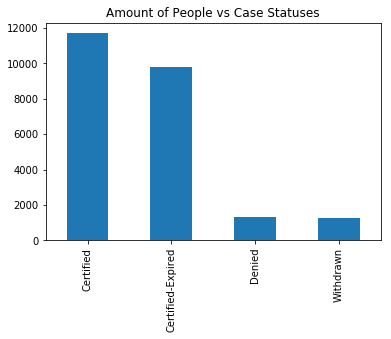

In [56]:
caseData = df['case_status'].value_counts()
caseData.plot('bar', title='Amount of People vs Case Statuses')

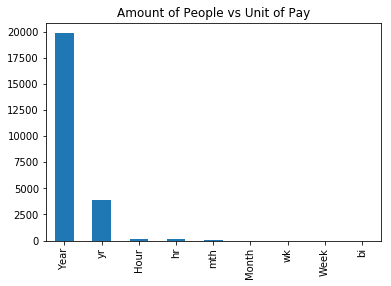

In [74]:
salaryData = df['wage_offer_unit_of_pay_9089'].value_counts()
salaryData.plot('bar', title='Amount of People vs Unit of Pay')

Since the data for wages is split in categories: Year, yr, Hour, hr, and mth, we can combine the similar categories and make a uniform category Year. The other categories are negligible. 

In [199]:
df[df.wage_offer_unit_of_pay_9089 != 'Month']
df[df.wage_offer_unit_of_pay_9089 != 'wk']
df[df.wage_offer_unit_of_pay_9089 != 'Week']
df[df.wage_offer_unit_of_pay_9089 != 'bi']

yr = df[df['wage_offer_unit_of_pay_9089'] == 'yr']

Year = df[df['wage_offer_unit_of_pay_9089'] == 'Year']

hr = df[df['wage_offer_unit_of_pay_9089'] == 'hr']
# hr.fillna(0, inplace=True)

Hour = df[df['wage_offer_unit_of_pay_9089'] == 'Hour']
# Hour.fillna(0, inplace=True)

mth = df[df['wage_offer_unit_of_pay_9089'] == 'mth']
# mth.fillna(0, inplace=True)

# Assumes 40hr weeks 
hr_to_yr = 40*52

In [200]:
df2 = pd.concat([yr, Year, hr, Hour, mth])
df2

,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_city,employer_decl_info_title,employer_name,...,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089
6,PERM,A-07354-06926,NaN,Certified-Expired,H-1B,NaN,10/7/2011,TROY,NaN,EMMA WILLARD SCHOOL,...,"Secondary School Teachers, Except Special and ...",Level II,25-2031.00,"Secondary School Teachers, Except Special and ...",OES,yr,Educational Services,47084,52000,yr
8,PERM,A-08004-10184,NaN,Certified,H-1B,NaN,2/29/2012,WILMINGTON,NaN,ELECTRONIC DATA SYSTEMS CORPORATION,...,Computer Systems Analysts,Level I,15-1051.00,Computer Systems Analysts,OES,yr,IT,44824,85000,yr
33,PERM,A-08224-77312,NaN,Certified,H-1B,NaN,2/16/2012,NORWOOD,NaN,ANALOG DEVICES INC.,...,Electronics Engineers,Level III,17-2072.00,"Electronics Engineers, Except Computer",OES,yr,Advanced Mfg,88130,96000,yr
53,PERM,A-08280-93404,NaN,Certified-Expired,H-1B,NaN,10/25/2011,WILMINGTON,NaN,"GE-HITACHI NUCLEAR ENERGY AMERICAS, LLC",...,Computer and Information Systems Manager,Level IV,11-3021.00,Computer and Information Systems Managers,OES,yr,Other Economic Sector,119954,180000,yr
62,PERM,A-08291-97042,NaN,Certified-Expired,H-1B,NaN,10/25/2011,WAUKESHA,NaN,"GE MEDICAL SYSTEMS, LLC",...,Operations Research Analysts,Level I,15-2031.00,Operations Research Analysts,OES,yr,Advanced Mfg,47000,92000,yr
110,PERM,A-08366-17436,NaN,Denied,H-1B,NaN,10/27/2011,IRVING,NaN,"USMLEWORLD, LLC",...,Software Engineer,Level III,15-1031.00,"Computer Software Engineers, Applications",OES,yr,IT,96117,96117,yr
117,PERM,A-09012-19630,NaN,Certified,H-1B,NaN,11/3/2011,RIVERDALE,NaN,THE HEBREW HOME FOR THE AGED AT RIVERDALE,...,"COMPUTER SPECIALISTS, ALL OTHER",Level I,15-1099.04,Web Developers,OES,hr,Health Care,36764,42900,yr
149,PERM,A-09056-30267,NaN,Certified,O-1,NaN,11/9/2011,VENICE,NaN,"DIGITAL DOMAIN, INC.",...,Multi-media Artists & Animators,Level III,27-1014.00,Multi-Media Artists and Animators,OES,yr,Other Economic Sector,123500,160500,yr
151,PERM,A-09058-30808,NaN,Certified,H-1B,NaN,11/10/2011,VENICE,NaN,"DIGITAL DOMAIN, INC.",...,Multi-media Artists & Animators,Level III,27-1014.00,Multi-Media Artists and Animators,OES,yr,Other Economic Sector,123500,160500,yr
163,PERM,A-09076-34255,NaN,Certified-Expired,H-1B,NaN,10/5/2011,SAN DIEGO,NaN,"QUALCOMM GLOBAL SERVICES, INC.",...,"Electronics Engineers, Except Computer",Level III,17-2072.00,"Electronics Engineers, Except Computer",OES,yr,Advanced Mfg,97760,118224,yr


In [201]:
Year['wage_offer_from_9089'] = pd.to_numeric(Year['wage_offer_from_9089'], errors='coerce')
yr['wage_offer_from_9089'] = pd.to_numeric(yr['wage_offer_from_9089'], errors='coerce')

Year['wage_offer_to_9089'] = pd.to_numeric(Year['wage_offer_to_9089'], errors='coerce')
yr['wage_offer_to_9089'] = pd.to_numeric(yr['wage_offer_to_9089'], errors='coerce')

Year.fillna(0, inplace=True)
yr.fillna(0, inplace=True)

In [202]:
hr['wage_offer_from_9089'] = hr['wage_offer_from_9089'].astype(float)*hr_to_yr
hr['wage_offer_from_9089'] = (hr['wage_offer_from_9089']/5000).astype(int)*5000

hr['wage_offer_to_9089'] = hr['wage_offer_to_9089'].astype(float)*hr_to_yr
hr['wage_offer_to_9089'] = (hr['wage_offer_to_9089']/5000).astype(int)*5000

Hour['wage_offer_from_9089'] = Hour['wage_offer_from_9089'].astype(float)*hr_to_yr
Hour['wage_offer_from_9089'] = (Hour['wage_offer_from_9089']/5000).astype(int)*5000

Hour['wage_offer_to_9089'] = Hour['wage_offer_to_9089'].astype(float)*hr_to_yr
Hour['wage_offer_to_9089'] = (Hour['wage_offer_to_9089']/5000).astype(int)*5000

mth['wage_offer_from_9089'] = mth['wage_offer_from_9089'].astype(float)*12
mth['wage_offer_from_9089'] = (mth['wage_offer_from_9089']/5000).astype(int)*5000

mth['wage_offer_to_9089'] = mth['wage_offer_to_9089'].astype(float)*12
mth['wage_offer_to_9089'] = (mth['wage_offer_to_9089']/5000).astype(int)*5000

In [203]:
max(hr['wage_offer_from_9089'])

330360000

In [204]:
Year['wage_offer_from_9089'] = (Year['wage_offer_from_9089']/5000).astype(int)*5000
yr['wage_offer_from_9089'] = (yr['wage_offer_from_9089']/5000).astype(int)*5000

Year['wage_offer_to_9089'] = (Year['wage_offer_to_9089']/5000).astype(int)*5000
yr['wage_offer_to_9089'] = (yr['wage_offer_to_9089']/5000).astype(int)*5000

In [205]:
df3 = pd.concat([yr, Year, hr, Hour, mth])
df3

,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_city,employer_decl_info_title,employer_name,...,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089
6,PERM,A-07354-06926,0,Certified-Expired,H-1B,0,10/7/2011,TROY,0,EMMA WILLARD SCHOOL,...,"Secondary School Teachers, Except Special and ...",Level II,25-2031.00,"Secondary School Teachers, Except Special and ...",OES,yr,Educational Services,45000,50000,yr
8,PERM,A-08004-10184,0,Certified,H-1B,0,2/29/2012,WILMINGTON,0,ELECTRONIC DATA SYSTEMS CORPORATION,...,Computer Systems Analysts,Level I,15-1051.00,Computer Systems Analysts,OES,yr,IT,40000,85000,yr
33,PERM,A-08224-77312,0,Certified,H-1B,0,2/16/2012,NORWOOD,0,ANALOG DEVICES INC.,...,Electronics Engineers,Level III,17-2072.00,"Electronics Engineers, Except Computer",OES,yr,Advanced Mfg,85000,95000,yr
53,PERM,A-08280-93404,0,Certified-Expired,H-1B,0,10/25/2011,WILMINGTON,0,"GE-HITACHI NUCLEAR ENERGY AMERICAS, LLC",...,Computer and Information Systems Manager,Level IV,11-3021.00,Computer and Information Systems Managers,OES,yr,Other Economic Sector,115000,180000,yr
62,PERM,A-08291-97042,0,Certified-Expired,H-1B,0,10/25/2011,WAUKESHA,0,"GE MEDICAL SYSTEMS, LLC",...,Operations Research Analysts,Level I,15-2031.00,Operations Research Analysts,OES,yr,Advanced Mfg,45000,90000,yr
110,PERM,A-08366-17436,0,Denied,H-1B,0,10/27/2011,IRVING,0,"USMLEWORLD, LLC",...,Software Engineer,Level III,15-1031.00,"Computer Software Engineers, Applications",OES,yr,IT,95000,95000,yr
117,PERM,A-09012-19630,0,Certified,H-1B,0,11/3/2011,RIVERDALE,0,THE HEBREW HOME FOR THE AGED AT RIVERDALE,...,"COMPUTER SPECIALISTS, ALL OTHER",Level I,15-1099.04,Web Developers,OES,hr,Health Care,35000,40000,yr
149,PERM,A-09056-30267,0,Certified,O-1,0,11/9/2011,VENICE,0,"DIGITAL DOMAIN, INC.",...,Multi-media Artists & Animators,Level III,27-1014.00,Multi-Media Artists and Animators,OES,yr,Other Economic Sector,120000,160000,yr
151,PERM,A-09058-30808,0,Certified,H-1B,0,11/10/2011,VENICE,0,"DIGITAL DOMAIN, INC.",...,Multi-media Artists & Animators,Level III,27-1014.00,Multi-Media Artists and Animators,OES,yr,Other Economic Sector,120000,160000,yr
163,PERM,A-09076-34255,0,Certified-Expired,H-1B,0,10/5/2011,SAN DIEGO,0,"QUALCOMM GLOBAL SERVICES, INC.",...,"Electronics Engineers, Except Computer",Level III,17-2072.00,"Electronics Engineers, Except Computer",OES,yr,Advanced Mfg,95000,115000,yr


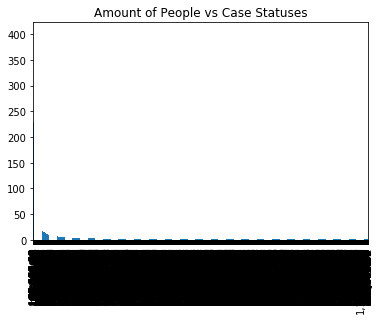

In [206]:
wage = df2['wage_offer_from_9089'].value_counts()
wage.plot('bar', title='Amount of People vs Wage Ofered')
f1 = plt.gcf()